In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 7
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

- Dataset yang digunakan merupakan dataset yang berisi informasi dari konsumen atau pelanggan perusahaan penerbangan, setiap baris data merepresentasikan informasi dari seorang pelanggan yang bisa dijadikan acuan sebagai nilai dari pelanggan tersebut

- Dalam kasus ini, akan dilakukan ***Clustering*** untuk mengelompokkan pelanggan dari perusahaan penerbangan sehingga akan lebih mudah nantinya untuk memberikan treatment yang sesuai dengan kelompok 


# 1. EDA

________________________________________________________________________________________________________________________________________

A. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat

## Import & Load Data

In [3]:
url = 'https://raw.githubusercontent.com/sulthonamar/UnsupervisedLearning/main/flight.csv'
df = pd.read_csv(url)

In [4]:
df.columns = df.columns.str.lower()
df.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
58064,11707,9/20/2007,9/7/2011,Female,4.0,beijing,beijing,CN,58.0,3/31/2014,...,0.0,1753.0,11/11/2012,507.0,109.500000,218.0,0.0,0.893611,1492.0,0.0
4074,59994,1/23/2012,1/23/2012,Female,5.0,HONG KONG,HONG KONG,HK,32.0,3/31/2014,...,26329.0,54893.0,3/28/2014,4.0,8.875000,33.0,1.0,0.693324,41736.0,1.0
9576,16209,12/8/2012,12/8/2012,Male,4.0,shenzhen,guangdong,CN,49.0,3/31/2014,...,10712.0,34032.0,3/26/2014,6.0,29.625000,97.0,0.0,0.665551,19164.0,0.0
28901,36601,3/7/2006,1/21/2009,Female,4.0,beijing,beijing,CN,48.0,3/31/2014,...,5164.0,8889.0,2/22/2014,39.0,79.285714,347.0,0.0,0.886465,29060.0,5.0
45827,46881,9/1/2012,10/2/2012,Male,4.0,chengdu,sichuan,CN,34.0,3/31/2014,...,0.0,4898.0,11/24/2012,494.0,13.250000,26.0,0.0,0.709096,3308.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  object 
 1   ffp_date           62984 non-null  object 
 2   first_flight_date  62984 non-null  object 
 3   gender             62981 non-null  object 
 4   ffp_tier           62984 non-null  float64
 5   work_city          60715 non-null  object 
 6   work_province      59736 non-null  object 
 7   work_country       62958 non-null  object 
 8   age                62564 non-null  float64
 9   load_time          62984 non-null  object 
 10  flight_count       62984 non-null  float64
 11  bp_sum             62984 non-null  float64
 12  sum_yr_1           62433 non-null  float64
 13  sum_yr_2           62846 non-null  float64
 14  seg_km_sum         62984 non-null  float64
 15  last_flight_date   62984 non-null  object 
 16  last_to_end        629

Dari fungsi `.info()` diketahui:
- terdapat 23 fitur dan 62988 baris data
- Beberapa fitur memiliki ***Missing Value*** diantaranya: `gender`, `work_city`, ` work_provice`, `work_country`, `age`, `sum_yr_1`, dan `sum_yr_2`
- Beberapa fitur memiliki tipe data yang tidak sesuai dengan nilai dari fitur sehingga jika dilakukan analisis lebih lanjut terutama untuk pendekatan grafis tidak dapat menginterpretasikan data yang dianalisis. Fitur-fitur tersebut adalah: 
    - `ffp_date`, `first_flight_date `, `last_flight_date`, `load_time`
    - Fitur-fitur di atas seharusnya memiliki tipe data `date` atau `datetime` namun dalam dataset disimpan dalam tipe data `obejct`
- Tipe data yang digunakan pada dataset ini terdiri dari : `float64(5)`, `int64(10)`, `object(8)`       

In [6]:
nums  = ['ffp_tier','age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','last_to_end','avg_interval','max_interval',
        'exchange_count','avg_discount','points_sum','point_notflight']
cats  = ['gender','work_city','work_province','work_country']
dates = ['ffp_date','first_flight_date','load_time','last_flight_date']

In [7]:
# Cek data null
df.isna().sum()

member_no               0
ffp_date                4
first_flight_date       4
gender                  7
ffp_tier                4
work_city            2273
work_province        3252
work_country           30
age                   424
load_time               4
flight_count            4
bp_sum                  4
sum_yr_1              555
sum_yr_2              142
seg_km_sum              4
last_flight_date        4
last_to_end             4
avg_interval            4
max_interval            4
exchange_count          4
avg_discount            4
points_sum              4
point_notflight         4
dtype: int64

Dari fungsi `.isna().sum()` diketahui:
- Terdapat data null pada fitur `gender`, `work_city`, `work_province`, `work_country`, `age`, `sum_yr_1`, dan `sum_yr_2`.
- Jumlah nilai null pada kolom `gender` dan `work_city` sangat sedikit dan bersifat kategorikal, sehingga dapat di drop.
- Nilai null pada `age`, `sum_yr_1`, dan `sum_yr_2` dapat diisi dengan nilai rata-rata.
- Nilai null pada `sum_yr_1`, dan `sum_yr_2 lebih baik diisi dengan nilai median.
- Nilai Null pada `work_city`, `work_province` dapat di isi dengan nilai mode.

### Handling Missing Value

In [8]:
df_2 = df.copy()

# Menghapus fitur 'gender', 'work_country'
df_2.dropna(subset=[ 'gender', 'work_country'], inplace=True)

# Mengisi nilai Null
df_2['age'] = df_2['age'].fillna(df_2['age'].mean())
df_2['sum_yr_1'] = df_2['sum_yr_1'].fillna(df_2['sum_yr_1'].median())
df_2['sum_yr_2'] = df_2['sum_yr_2'].fillna(df_2['sum_yr_2'].median())
df_2['work_city'] = df_2['work_city'].fillna(df_2['work_city'].mode()[0] )
df_2['work_province'] = df_2['work_province'].fillna(df_2['work_province'].mode()[0])


In [9]:
#cek data null setelah dilakukan Pre-processing
df_2.isna().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

**Setelah dilakukan pre-processing tidak terdapat lagi nilai null pada data.**

### Handling Duplicate

In [322]:
df_2.duplicated().sum()

0

**Tidak ada kolom yang memiliki nilai duplikat atau double dalam dataset**

______________________________________________________________________________________________________________________________________

B. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)


### Deskripsi Fitur Numeric

In [323]:
df_2[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
ffp_tier,62959.0,4.102178,0.373859,4.0,4.000000,4.000000,4.000000,6.0
age,62959.0,42.472562,9.852225,6.0,35.000000,41.000000,48.000000,110.0
flight_count,62959.0,11.840356,14.051216,2.0,3.000000,7.000000,15.000000,213.0
bp_sum,62959.0,10924.320081,16334.135931,0.0,2518.000000,5701.000000,12831.000000,505308.0
sum_yr_1,62959.0,5333.127056,8077.985818,0.0,1020.000000,2800.000000,6524.500000,239560.0
sum_yr_2,62959.0,5597.212773,8689.250029,0.0,785.000000,2773.000000,6827.500000,234188.0
seg_km_sum,62959.0,17124.918439,20960.704310,368.0,4748.500000,9995.000000,21272.000000,580717.0
last_to_end,62959.0,176.106752,183.820322,1.0,29.000000,107.000000,267.000000,731.0
avg_interval,62959.0,67.750311,77.520823,0.0,23.370370,44.666667,82.000000,728.0
max_interval,62959.0,166.034642,123.394447,0.0,79.000000,143.000000,228.000000,728.0


**Insight:**

- Dilihat dari nilai standar devisasi, fitur `bp_sum`, `sum_yr_1`, `sum_yr_2`, `seg_km_sum`, dan `points_sum` memiliki nilai yang sangat tinggi dibandingkan dengan nilai mean. Hal ini mengindikasikan bahwa fitur-fitur ini memiliki persebaran data yang luas sehingga fitur ini mengandung data yang beragam. 
- Dilihat dari nilai mean dan median, semua fitur numerik kecuali `exchange_count`, `avg_discount` dan `point_notflight` memiliki nilai mean yang lebih tinggi dibandingkan dengan nilai median, hal ini mengindikasikan data lebih condong ke kanan atau Positif Skewed.
- Fitur  `exchange_count` dan `point_notflight` memiliki mean yang lebih kecil dari median yang mengindikasikan data lebih condong ke kiri
- Fitur `avg_discount` memiliki nilai median dan mean dengan perbedaan 0.01 sehingga distribusi datanya mendekati normal


### Deskripsi Fitur Kategorik

In [324]:
df_2[cats].describe().T

,count,unique,top,freq
gender,62959,2,Male,48111
work_city,62959,3232,guangzhou,11630
work_province,62959,1164,guangdong,20731
work_country,62959,118,CN,57747


**Insight:**
- Tidak perlu ada fitur lain yang dibuang atau didrop untuk fitur kategorik, karena nilai unik dari masing-masing kolom masih dalam batas wajar.
- Gender Male mempunyai jumlah persentase hampir 50% dari dataset yang ada

### Univariete Analysis

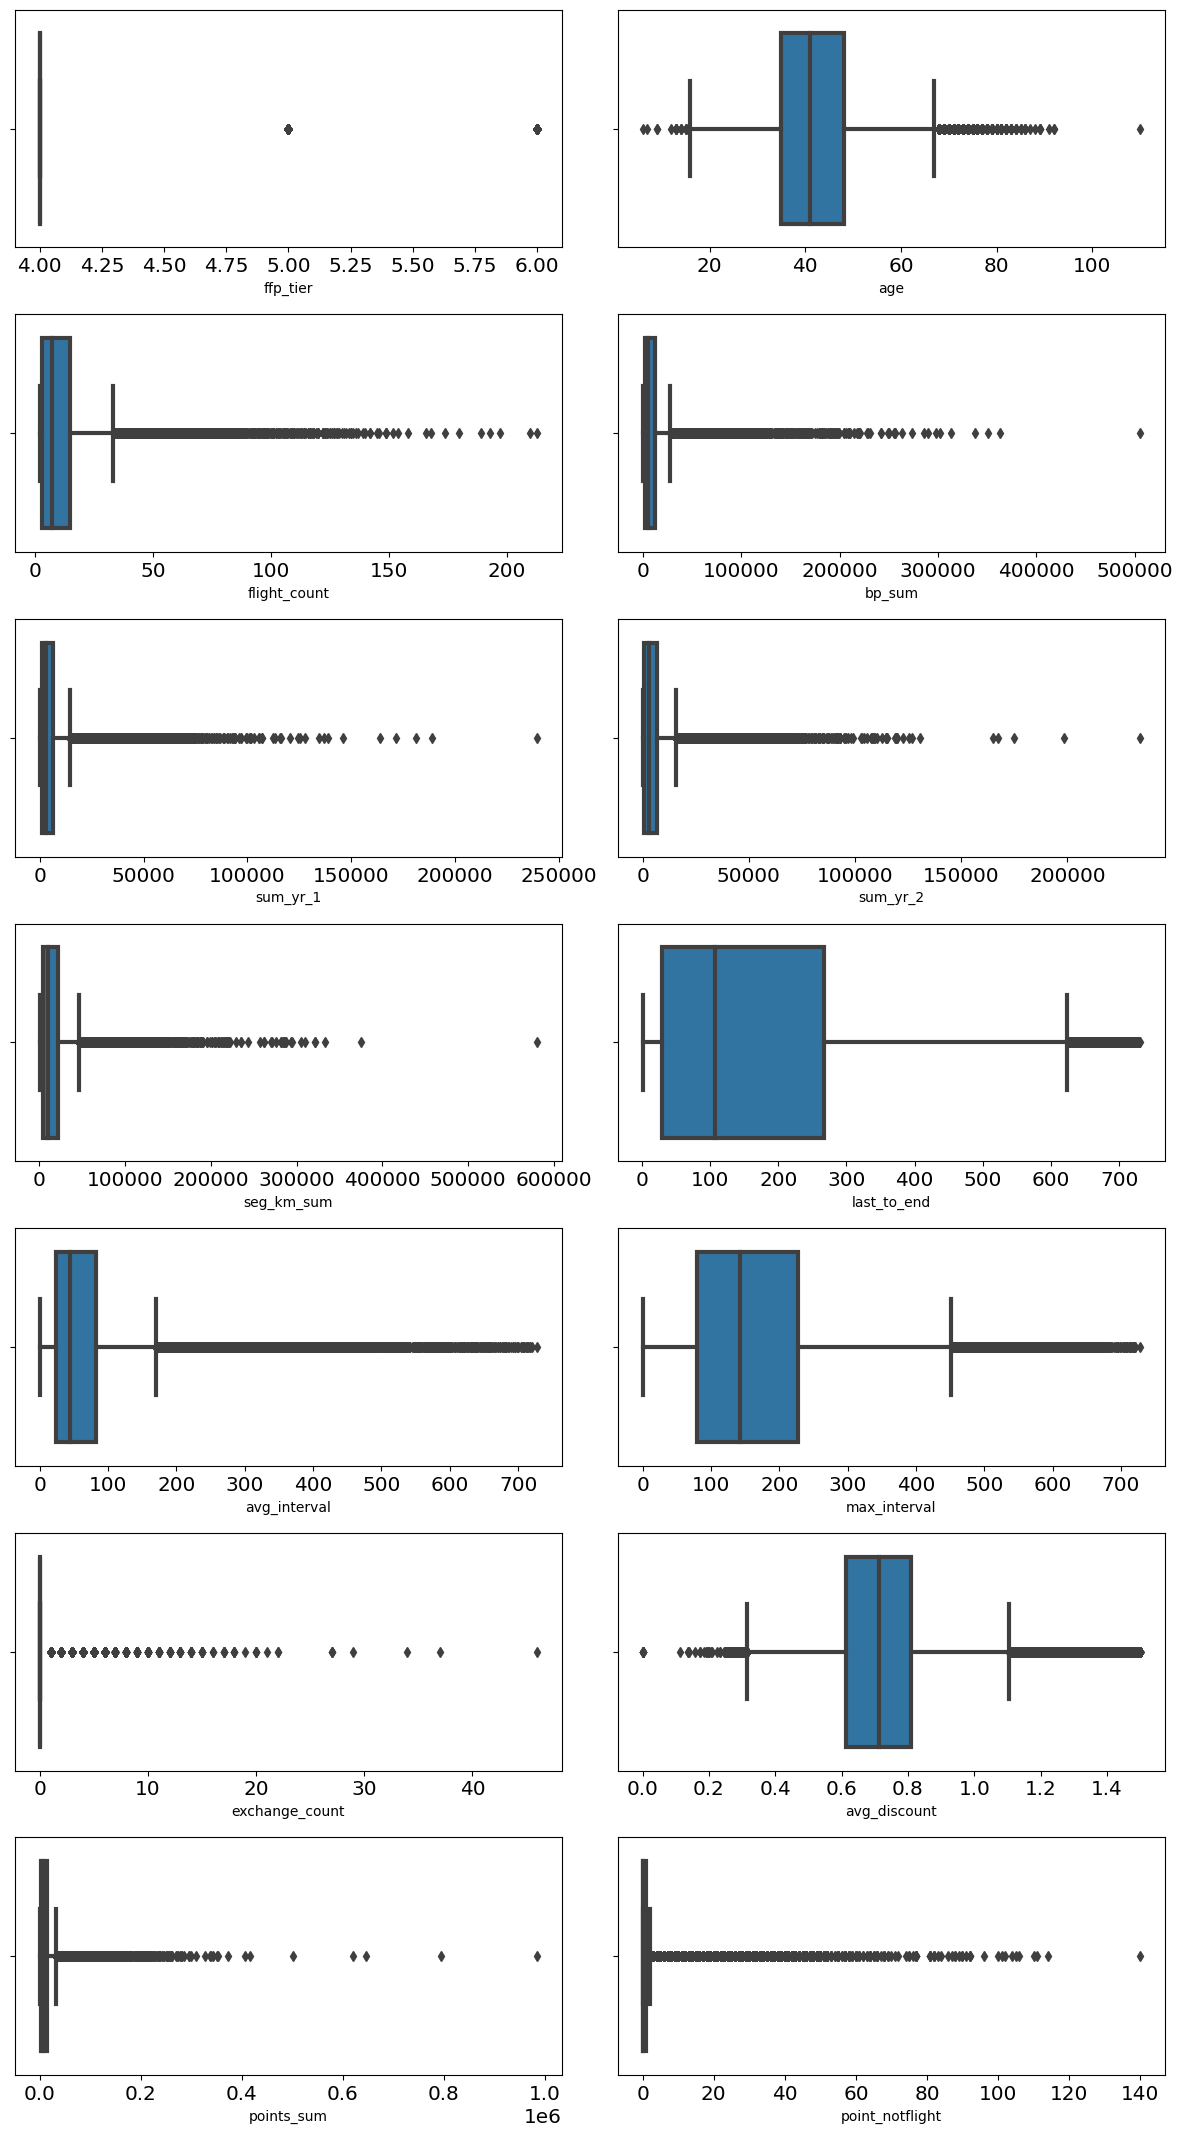

In [325]:
# boxplot visualization for numerical data

plt.figure(figsize=(12, 24))
for i in range(0, len(nums)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df_2[nums[i]])
plt.tight_layout()

plt.show()

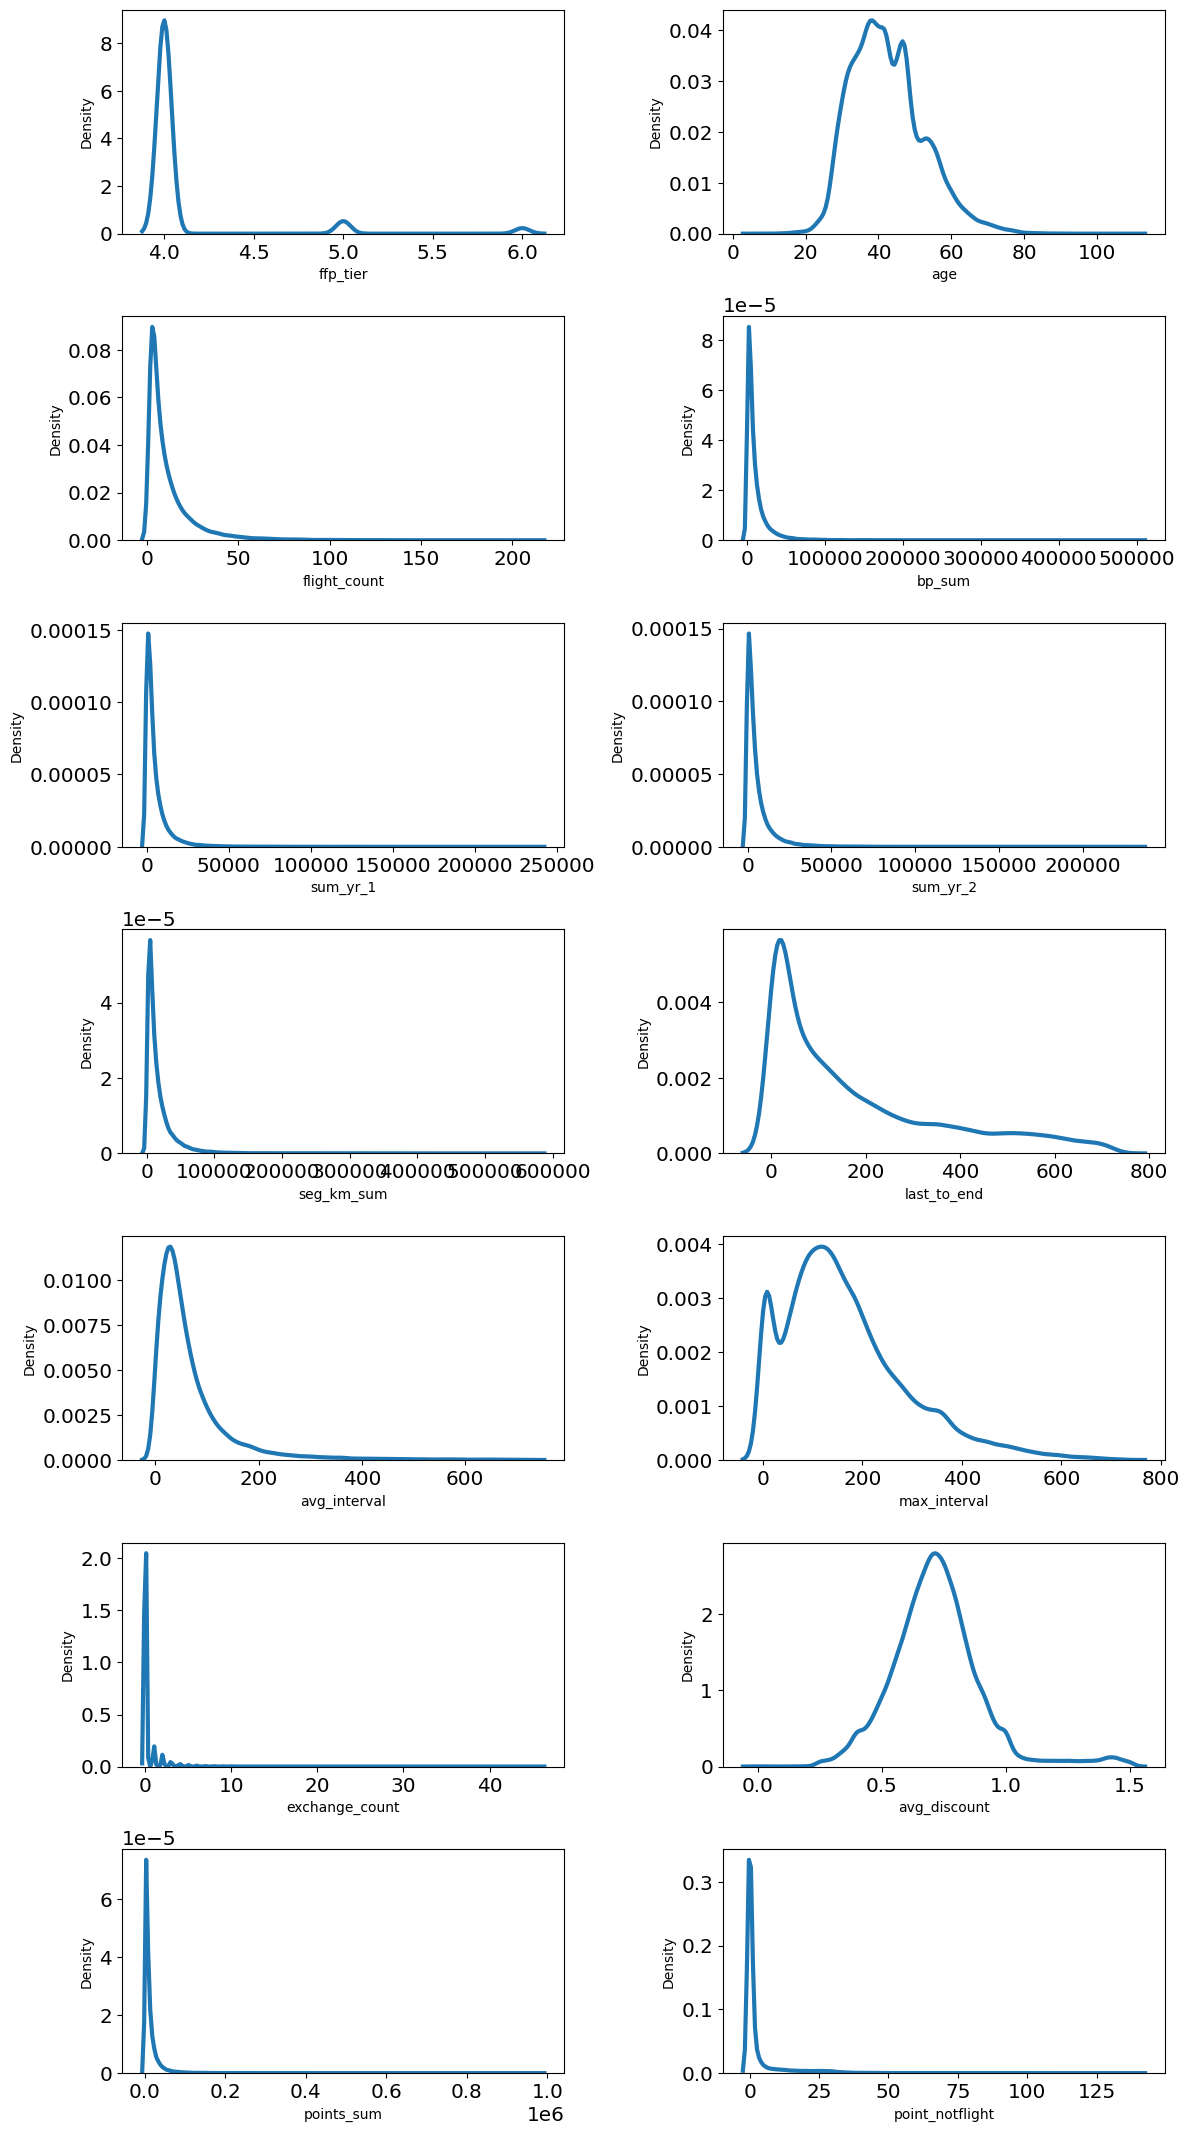

In [326]:
# kde plot visualization for numerical data

plt.figure(figsize=(12, 24))
for i in range(0, len(nums)):
    plt.subplot(8, 2, i+1)
    sns.kdeplot(x=df_2[nums[i]])
plt.tight_layout()

plt.show()

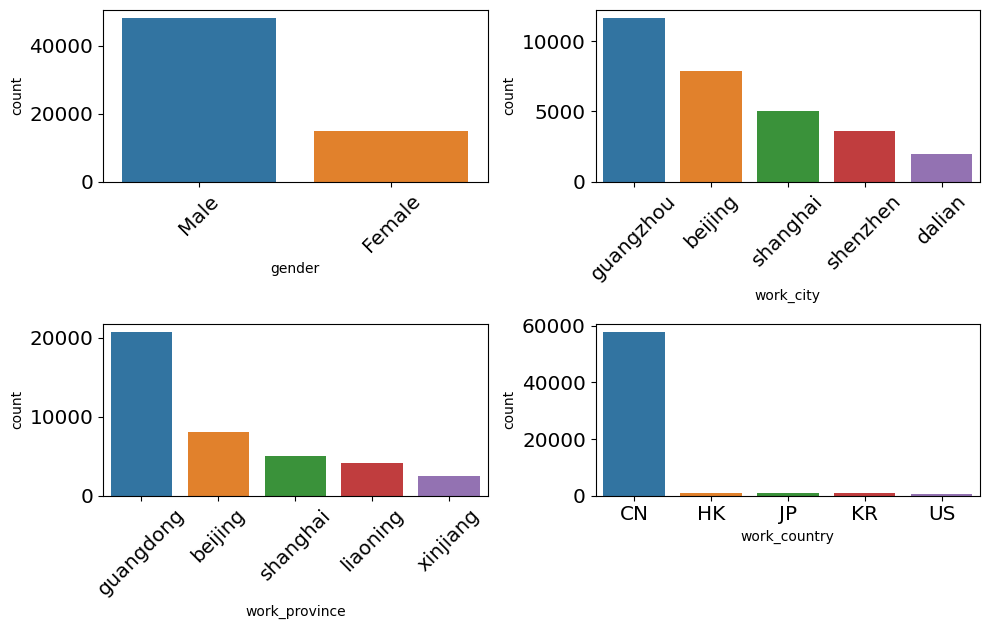

In [327]:
# count plot visualization for categorical data data

plt.figure(figsize=(10, 24))

for i in range(0, len(cats)):
    value_counts = df_2[cats[i]].value_counts()

    top5 = value_counts[:5].index.tolist()
    plt.xticks(rotation=45)
    # create countplot for top 10 categories
    plt.subplot(8, 2, i+1)
    sns.countplot(x=cats[i], data=df_2, order=top5)

    plt.tight_layout()

plt.show()

####  **Insight dari Univariate Analysis :** 
Fitur Numerik
- Terdapat outlier pada semua kolom numeric sehingga perlu untuk dilakukan ***Handling Outlier***
- Distribusi data pada kolom numerical bersifat right_skew/ positive skew
- Setiap fitur numerik memiliki range nilai yang berbeda-beda, sehingga perlu dilakukan ***Fitur Transformation***

Fitur Kategorik
- Pengguna konsumen **paling banyak** berasal dari negara **China**
- Provinsi konsumen **paling banyak** berasal dari provinsi **Guangdong** dan kota pada **Guangzhou**
- **Mayoritas** pengguna maskapai adalah **laki-laki**



### Handling Outlier 

- Karena kita akan melakukan ***Clustering*** pada dataset, maka fitur-fitur yang memiliki nilai **outlier** perlu untuk ditangani. 
- Untuk **menghapus** data yang outlier diputuskan akan **menggunakan z-score**, namun **syarat** untuk menggunakan z-score adalah data harus **berdistribusi normal** sehingga langkah yang akan dilakukan adalah:
    - Melakukan **log transformation** pada kolom numerik agar data yang skewed mendekati normal
    - Menghilangkan data outlier dengan bantuan z-score

In [328]:
#log transformation
for num in nums:
    df_2[num] = np.log(df_2[num] + (df_2[df_2[num] > 0][num].min() / 2))

In [329]:
#handling outlier dengan z-score
from scipy import stats
print(f'Jumlah data sebelum drop outlier: {len(df_2)}')

for i in nums:
    if i not in ['id', 'rating']:
        z_scores = np.abs(stats.zscore(df_2[i]))
        df_2 = df_2[z_scores <= 3]

print(f'Jumlah data setelah drop oulier: {len(df_2)}')

Jumlah data sebelum drop outlier: 62959
Jumlah data setelah drop oulier: 54471


### Feature Transformation

Karena akan melakukan clustering, dengan nilai data yang memiliki range yang berbeda, maka dilakukan **standarisasi** pada semua data numerik untuk menyamakan skala dari data

In [330]:

for i in nums:
    df_2[i] = StandardScaler().fit_transform(df_2[i].values.reshape(len(df_2), 1))

In [331]:
df_2.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
48055,11125,4/18/2005,9/7/2013,Male,-0.217804,guangzhou,guangdong,CN,1.105493,3/31/2014,...,0.273809,-1.169580,1/25/2014,-0.135208,0.393205,-0.366250,-0.327334,1.197313,-0.603983,-0.546346
32616,35169,6/25/2009,6/25/2009,Male,-0.217804,kunming,yunnan,CN,0.170636,3/31/2014,...,-1.860181,0.018067,10/25/2012,1.278906,-0.700532,-0.462152,-0.327334,-0.378347,-0.172197,-0.546346
17888,17769,1/8/2007,1/8/2007,Male,-0.217804,changchun,jilin,CN,0.372898,3/31/2014,...,0.202993,0.634131,12/19/2013,0.166234,0.150350,1.119276,-0.327334,0.339411,0.504943,-0.546346
43223,53579,2/15/2006,2/15/2006,Male,-0.217804,wuhanshi,hubei,CN,-0.040619,3/31/2014,...,-1.860181,-0.844565,10/15/2012,1.291932,0.139169,0.134249,-0.327334,0.924058,-0.287908,-0.546346
17544,3905,1/15/2009,1/19/2009,Male,-0.217804,shenzhen,guangdong,CN,0.170636,3/31/2014,...,1.074664,0.778934,3/29/2014,-2.176296,-0.636507,-0.377769,-0.327334,-0.185238,0.274435,-0.546346


________________________________________________________________________________________________________________________________________

C. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

### Multivariate Analysis

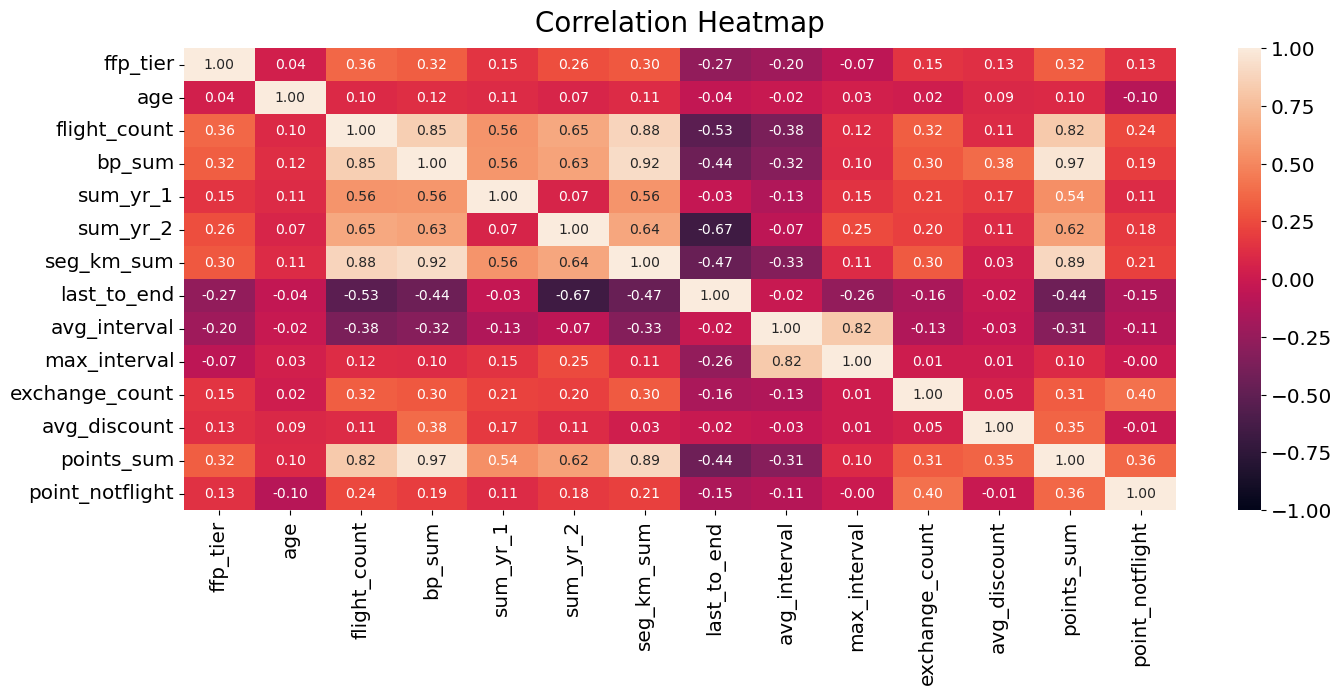

In [332]:
# Correlation Heatmap (Numeric)
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_2[nums].corr(),
                      vmin=-1,
                      vmax=1,
                      fmt='.2f' ,
                      annot=True)

heatmap.set_title('Correlation Heatmap',
                  fontdict={'fontsize':20},
                  pad=12);

**Insight:**

Berdasarkan correlation heatmap dapat dilihat bahwa : 
- fitur `flight_count` dengan fitur `bp_sum`, `seg_km_sum` dan `points_sum`memiliki multicollinearity yang tinggi
- fitur `bp_sum`dengan fitur `seg_km_sum`, dan `points_sum`memiliki multicollinearity yang tinggi
- fitur `seg_km_sum` dan `points_sum`memiliki multicollinearity yang tinggi
- fitur `avg_interval` dan `max_interval`memiliki multicollinearity yang tinggi

Fitur yang memiliki multikoleniaritas tinggi bisa dipertimbangkan untuk didrop salah satu fiturnya

In [333]:
removed_feat = ['flight_count', 'bp_sum', 'seg_km_sum', 'max_interval']
df_2 = df_2.drop(removed_feat, axis=1)
                 
for i in removed_feat:
    nums.remove(i)

# 2. Feature Engineering

## 2.1 Additional Data Preprocessing

pada kolom `last_flight_date` terdapat kolom yang memiliki value yang tidak sesuai formatnya, yaitu value 2014/2/29 0:00:00, sehingga diperlukan handling untuk data tersebut

In [10]:
# cek kolom last_flight_date untuk data dengan format 2014/2/29  0:00:00
df_2[df_2['last_flight_date'] == '2014/2/29  0:00:00']

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
248,56497,6/17/2007,6/17/2007,Female,6.0,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000.0,2014/2/29 0:00:00,32.0,13.250000,57.0,0.0,1.373478,132653.0,4.0
447,17306,8/26/2009,4/29/2010,Male,5.0,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453.0,2014/2/29 0:00:00,32.0,22.766667,75.0,6.0,1.375395,101413.0,7.0
473,915,11/10/2006,1/26/2007,Male,5.0,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717.0,2014/2/29 0:00:00,32.0,14.250000,65.0,1.0,1.425974,93153.0,8.0
832,20336,7/13/2005,8/6/2005,Male,5.0,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222.0,2014/2/29 0:00:00,32.0,8.696203,34.0,2.0,0.664970,91476.0,15.0
1051,62884,5/24/2006,4/21/2007,Male,5.0,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859.0,2014/2/29 0:00:00,32.0,19.115385,72.0,4.0,1.388584,69047.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4.0,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513.0,2014/2/29 0:00:00,32.0,117.000000,211.0,0.0,0.276667,0.0,0.0
61871,48742,7/26/2009,7/26/2009,Male,4.0,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298.0,2014/2/29 0:00:00,32.0,135.000000,135.0,0.0,0.690000,1094.0,1.0
61909,9190,4/11/2011,4/20/2011,Male,4.0,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595.0,2014/2/29 0:00:00,32.0,1.000000,1.0,0.0,0.340000,3356.0,19.0
62721,38776,10/31/2007,3/13/2008,Male,4.0,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199.0,2014/2/29 0:00:00,32.0,78.000000,78.0,0.0,0.489525,276.0,0.0


In [22]:
df_3 = df_2.copy()

# Mengubah semua nilai '2014/2/29  0:00:00' pada kolom 'last_flight_date' menjadi '2/29/2014'
df_3.loc[df_3['last_flight_date'] == '2014/2/29  0:00:00', 'last_flight_date'] = '2/29/2014'

In [23]:
# Konversi ke datetime
df_3['load_time'] = pd.to_datetime(df_3['load_time'])
df_3['last_flight_date'] = pd.to_datetime(df_3['last_flight_date'], errors='coerce')

# cek data info
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62955 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          62955 non-null  object        
 1   ffp_date           62955 non-null  object        
 2   first_flight_date  62955 non-null  object        
 3   gender             62955 non-null  object        
 4   ffp_tier           62955 non-null  float64       
 5   work_city          62955 non-null  object        
 6   work_province      62955 non-null  object        
 7   work_country       62955 non-null  object        
 8   age                62955 non-null  float64       
 9   load_time          62955 non-null  datetime64[ns]
 10  flight_count       62955 non-null  float64       
 11  bp_sum             62955 non-null  float64       
 12  sum_yr_1           62955 non-null  float64       
 13  sum_yr_2           62955 non-null  float64       
 14  seg_km_sum 

In [27]:
df_3['last_flight_date'].fillna(pd.to_datetime('2023-02-01'), inplace=True)

In [28]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62955 entries, 0 to 62987
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          62955 non-null  object        
 1   ffp_date           62955 non-null  object        
 2   first_flight_date  62955 non-null  object        
 3   gender             62955 non-null  object        
 4   ffp_tier           62955 non-null  float64       
 5   work_city          62955 non-null  object        
 6   work_province      62955 non-null  object        
 7   work_country       62955 non-null  object        
 8   age                62955 non-null  float64       
 9   load_time          62955 non-null  datetime64[ns]
 10  flight_count       62955 non-null  float64       
 11  bp_sum             62955 non-null  float64       
 12  sum_yr_1           62955 non-null  float64       
 13  sum_yr_2           62955 non-null  float64       
 14  seg_km_sum 

## 2.2 Feature Engineering

#### A. Membuat Kolom Recency

In [29]:
# Hitung Recency dalam hari
df_3['recency'] = (df_3['load_time'] - df_3['last_flight_date']).dt.days

In [30]:
df_3.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,recency
0,54993,11/2/2006,12/24/2008,Male,6.0,.,beijing,CN,31.0,2014-03-31,...,580717.0,2014-03-31,1.0,3.483254,18.0,34.0,0.961639,619760.0,50.0,0
1,28065,2/19/2007,8/3/2007,Male,6.0,guangzhou,beijing,CN,42.0,2014-03-31,...,293678.0,2014-03-25,7.0,5.194245,17.0,29.0,1.252314,415768.0,33.0,6
2,55106,2/1/2007,8/30/2007,Male,6.0,.,beijing,CN,40.0,2014-03-31,...,283712.0,2014-03-21,11.0,5.298507,18.0,20.0,1.254676,406361.0,26.0,10
3,21189,8/22/2008,8/23/2008,Male,5.0,Los Angeles,CA,US,64.0,2014-03-31,...,281336.0,2013-12-26,97.0,27.863636,73.0,11.0,1.090870,372204.0,12.0,95
4,39546,4/10/2009,4/15/2009,Male,6.0,guiyang,guizhou,CN,48.0,2014-03-31,...,309928.0,2014-03-27,5.0,4.788079,47.0,27.0,0.970658,338813.0,39.0,4


kolom ***recency*** dibuat untuk mengetahui selisih antara data diambil dan tanggal terakhir penerbangan, hal ini dilakukan agar mengetahui seberapa sering pelanggan terbang.

#### B. Select 3 Features

In [334]:
std = df[nums].describe(include='all').loc['std'].reset_index()
std.sort_values('std', ascending=False).head(6)

,index,std
8,points_sum,20507.816700
3,sum_yr_2,8703.364247
2,sum_yr_1,8109.450147
4,last_to_end,183.822223
5,avg_interval,77.517866
1,age,9.885915


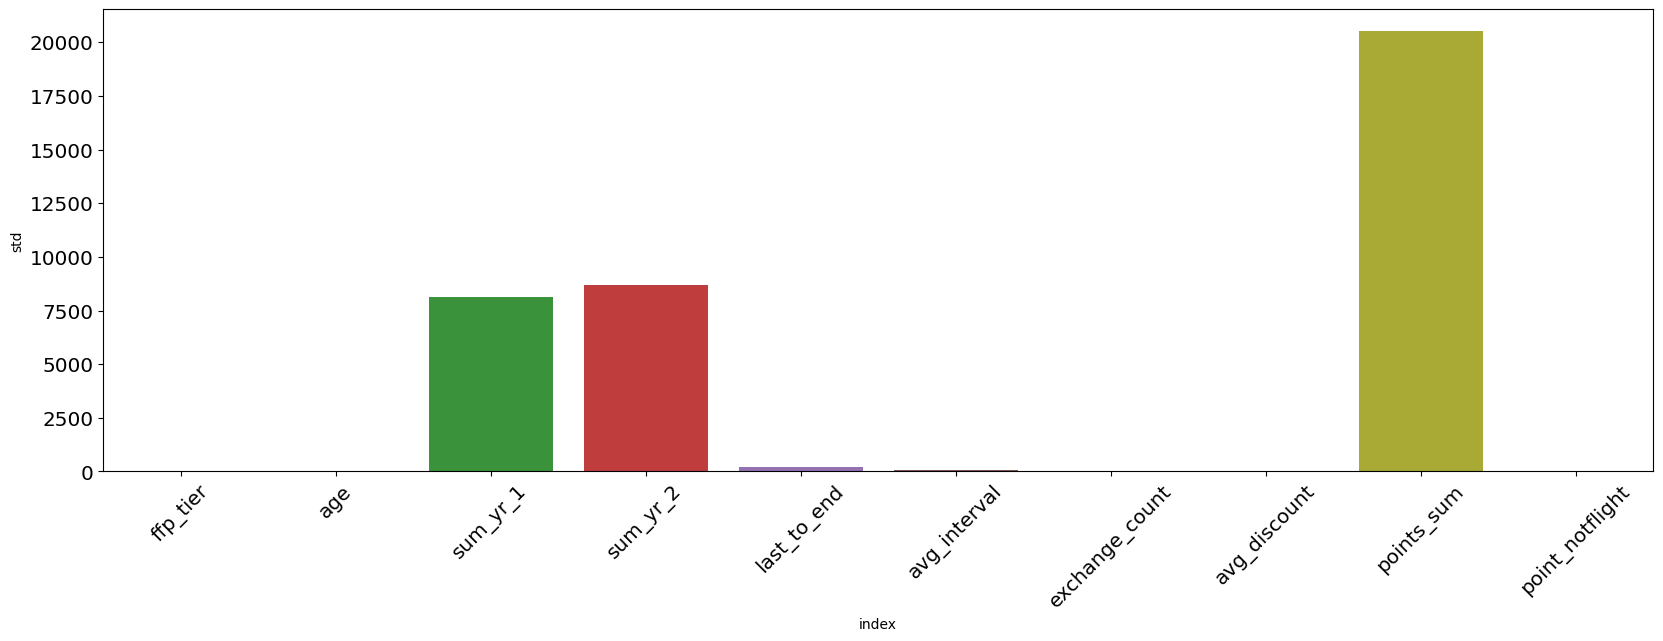

In [335]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x= 'index', y='std', data=std, ax=ax)

ax.tick_params(axis='x', labelrotation=45)
plt.show()

- Dalam kasus ini kami memilih features yang akan digunakan untuk melakukan modeling dengan melihat **Standar Deviasi** dari masing-masing fitur. 
- 3 Fitur yang memiliki standar deviasi tertinggi akan diambil menjadi fitur yang akan digunakan untuk melakukan pemodelan

**Argument**
- Penggunaan standar deviasi sebagai acuan pengambilan feature karena dalam dataset tidak dijelaskan masalah bisnis yang mendetail dari perusahaan terkait data, sehingga tidak diketahui dengan jelas bagaiamana proses bisnis yang berjalan diperusahaan. 
- Standar deviasi merepresentasikan keragaman dan persebaran dari data yang dimana, semakin tinggi nilai std data menandakan semakin ragam dan distribusi data semakin luas dan juga dapat mengindikasikan bahwa fitur-fitur yang memiliki std tinggi memiliki pengaruh kuat terhadap target nantinya

# Modeling - ***Clustering***

#### Dataset yang digunakan

In [336]:
df_model = df_2[['points_sum', 'sum_yr_2', 'sum_yr_1']]

#### Mencari nilai optimal dari K

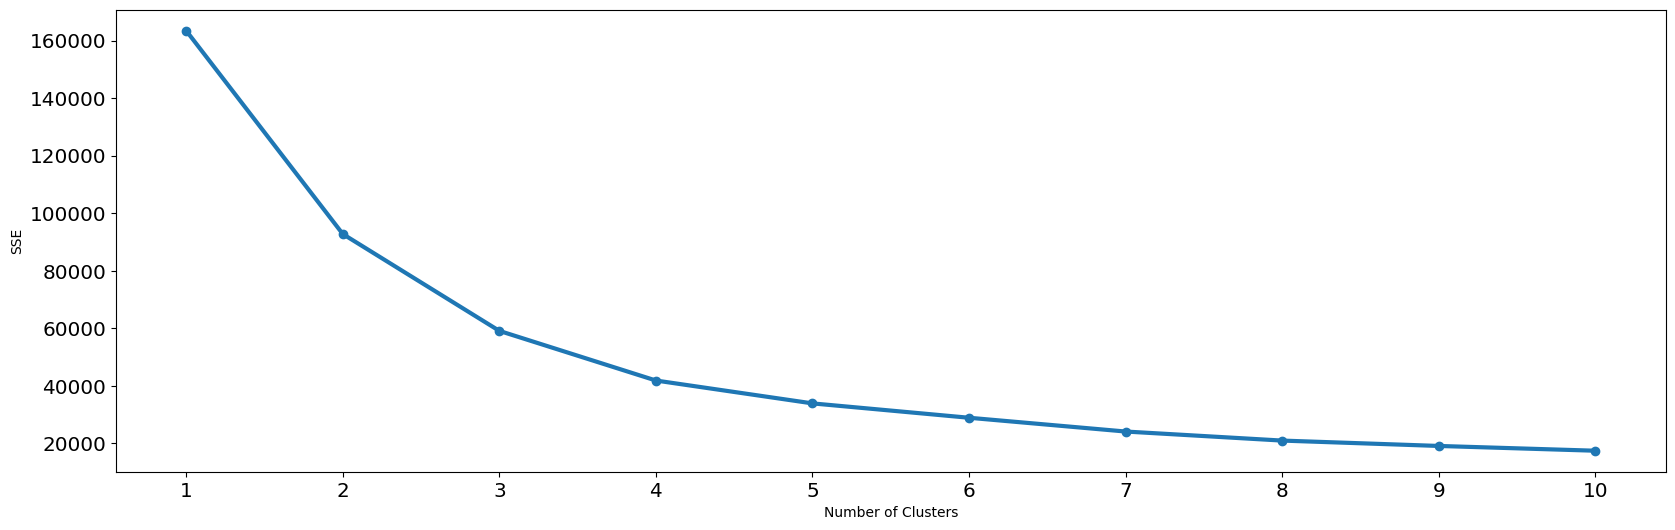

In [337]:
#menemukan nilai optimal dari K

kmeans_kwargs = {
                "init": "random",
                "n_init": 10,
                "random_state": 1,
                }

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_model)
    sse.append(kmeans.inertia_)

#visualize results
plt.subplots(figsize=(20, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Dilihat dari grafik, terdapat bend pada k=2

#### Menggunakan nilai optimal K untuk pemodelan

In [359]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)
kmeans.fit(df_model)

KMeans(init='random', n_clusters=2, random_state=1)

In [360]:
df_model['target'] = kmeans.labels_

In [361]:
df_model

,points_sum,sum_yr_2,sum_yr_1,target
170,2.971833,1.731845,2.208701,0
184,2.945251,1.609600,2.147667,0
186,2.946706,1.884254,2.011198,0
199,2.704061,1.719439,1.737726,0
206,3.024121,1.893951,1.986020,0
...,...,...,...,...
62915,-2.635215,0.241113,-2.047752,1
62917,-2.635215,-1.860181,0.242089,0
62923,-2.635215,-1.860181,0.242089,0
62928,-2.635215,-1.860181,-2.047752,1


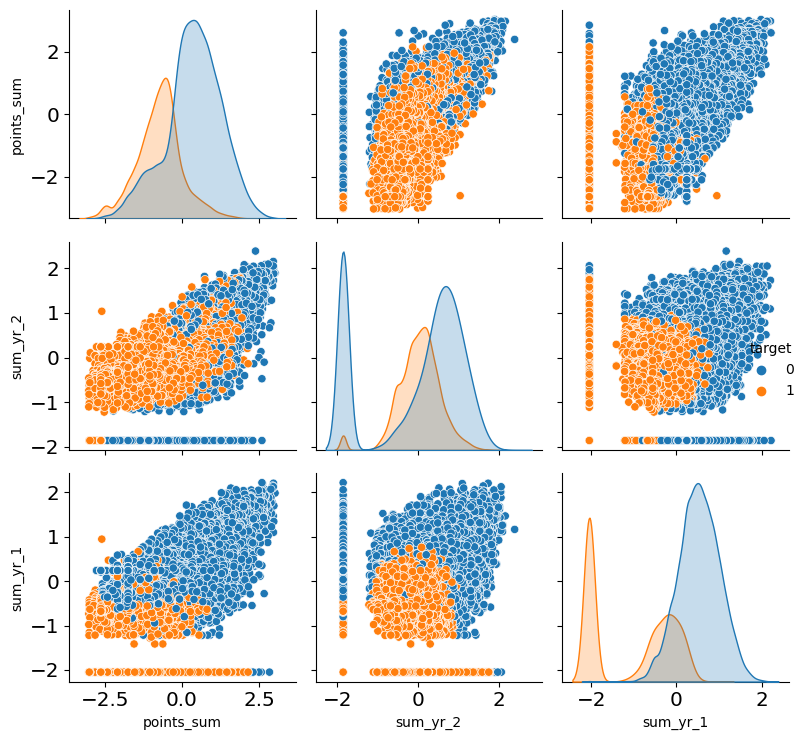

In [362]:
sns.pairplot(data=df_model, hue='target', diag_kind='kde')
plt.tight_layout()
plt.show()

### Evaluasi dengan PCA

In [363]:
df_pca = df_2[['points_sum', 'sum_yr_2', 'sum_yr_1']]

In [364]:
pcs = PCA()
pcs.fit(df_pca)
hasil_pca = pcs.transform(df_pca)

data_pca = pd.DataFrame(hasil_pca, columns = ['pc1', 'pc2', 'pca3'])
data_pca.describe()

,pc1,pc2,pca3
count,5.447100e+04,5.447100e+04,5.447100e+04
mean,-1.109379e-15,-7.041950e-18,1.908807e-16
std,1.362481e+00,9.656716e-01,4.595436e-01
min,-4.070189e+00,-2.866370e+00,-2.852044e+00
25%,-1.078848e+00,-4.919982e-01,-2.875419e-01
50%,-1.978017e-02,-4.340810e-02,-7.508912e-02
75%,1.027204e+00,4.001911e-01,2.343994e-01
max,4.181605e+00,2.925846e+00,3.064394e+00


In [365]:
data_pca['target'] = kmeans.labels_

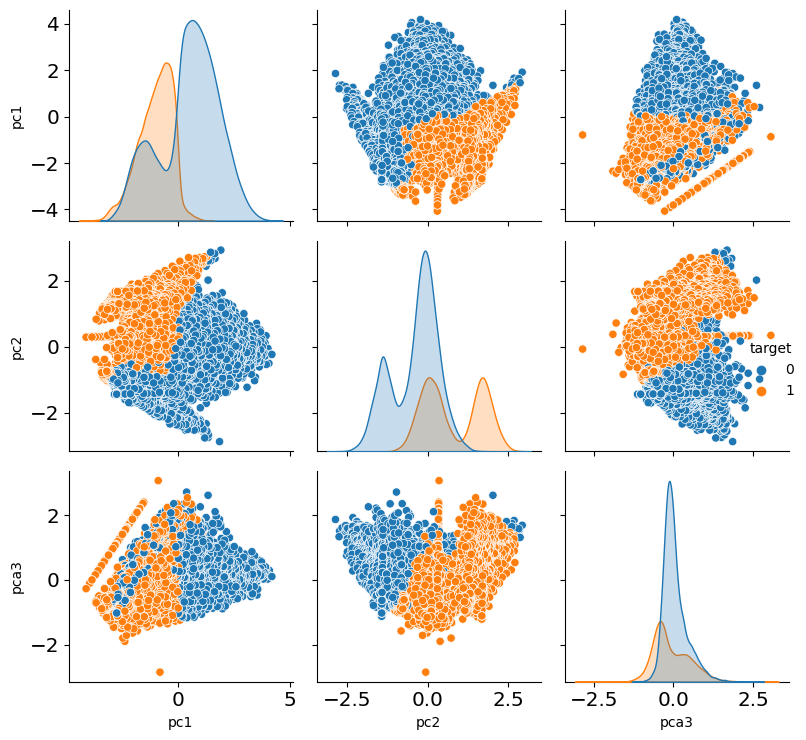

In [366]:
sns.pairplot(data=data_pca, hue='target', diag_kind='kde')
plt.tight_layout()
plt.show()